# Search Queries Anomaly Detection using Python

## Introduction
Search Queries Anomaly Detection is crucial for identifying unusual patterns or outliers in search query data. These anomalies can help businesses identify potential issues, optimization opportunities, or emerging trends. In this notebook, we will conduct an anomaly detection analysis on search query data using machine learning techniques.


## Contents
1. Data Loading and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Anomaly Detection using Isolation Forest
5. Analysis of Detected Anomalies
6. Conclusion and Insights


In [1]:
import pandas as pd

# Load the dataset
queries_df = pd.read_csv("Queries.csv")

# Display first few rows
queries_df.head()

# Data overview
print(queries_df.info())

# Convert CTR to a numeric type
queries_df['CTR'] = queries_df['CTR'].str.rstrip('%').astype('float') / 100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB
None


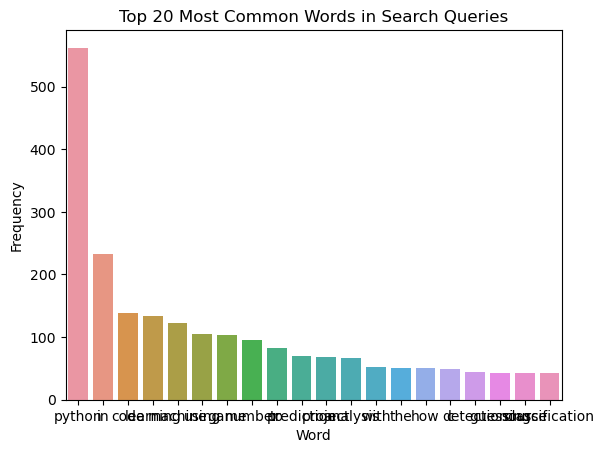

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re

# Common words in queries
def clean_and_split(query):
    words = re.findall(r'\b[a-zA-Z]+\b', query.lower())
    return words

word_counts = Counter()
for query in queries_df['Top queries']:
    word_counts.update(clean_and_split(query))

# Convert to DataFrame for plotting
word_freq_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])

# Plot the most common words
sns.barplot(x='Word', y='Frequency', data=word_freq_df)
plt.title("Top 20 Most Common Words in Search Queries")
plt.show()


In [3]:
# Select features for anomaly detection
features = queries_df[['Clicks', 'Impressions', 'CTR', 'Position']]


In [4]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model and predict anomalies
iso_forest.fit(features)
queries_df['anomaly'] = iso_forest.predict(features)

# Extract anomalies
anomalies = queries_df[queries_df['anomaly'] == -1]
anomalies.head()


,Top queries,Clicks,Impressions,CTR,Position,anomaly
0,number guessing game python,5223,14578,0.3583,1.61,-1
1,thecleverprogrammer,2809,3456,0.8128,1.02,-1
2,python projects with source code,2077,73380,0.0283,5.94,-1
4,the clever programmer,1931,2528,0.7638,1.09,-1
15,rock paper scissors python,1111,35824,0.0310,7.19,-1


In [5]:
# Display detected anomalies
anomalies[['Top queries', 'Clicks', 'Impressions', 'CTR', 'Position']]


,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
4,the clever programmer,1931,2528,0.7638,1.09
15,rock paper scissors python,1111,35824,0.0310,7.19
21,classification report,933,39896,0.0234,7.53
34,machine learning roadmap,708,42715,0.0166,8.97
82,r2 score,367,56322,0.0065,9.33
232,standardscaler,177,39267,0.0045,10.23
929,python turtle,52,18228,0.0029,18.75
